In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
import numpy as np
def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(train_set.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
450      -118.19     33.78                31.0       1648.0           484.0   
2545     -122.20     37.40                37.0       1296.0           194.0   
10743    -118.31     34.04                52.0       1277.0           285.0   
17250    -117.30     34.12                50.0       1629.0           437.0   
5089     -122.60     38.24                16.0       1410.0           209.0   

       population  households  median_income  median_house_value  \
450         898.0       457.0         1.5844            162500.0   
2545        540.0       192.0         8.2782            500001.0   
10743       954.0       334.0         2.5833            234600.0   
17250      1581.0       394.0         2.2019             63500.0   
5089        741.0       229.0         4.7250            204500.0   

      ocean_proximity  
450        NEAR OCEAN  
2545       NEAR OCEAN  
10743       <1H OCEAN  
17250          INLAN

In [ ]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])


In [ ]:
# [한글 폰트 설정 셀]
!apt-get -qq install -y fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missin

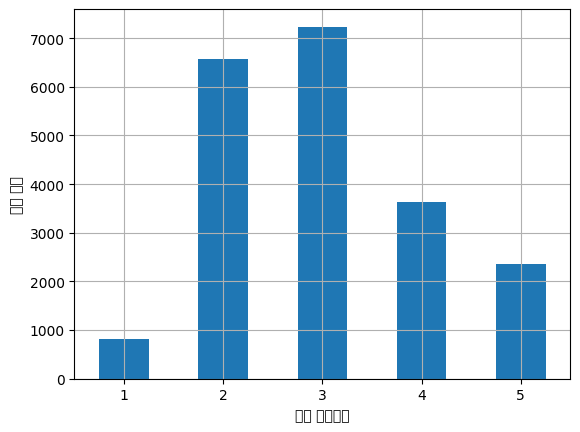

In [ ]:
import matplotlib.pyplot as plt
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("소득 카테고리")
plt.ylabel("구역 개수")
plt.show

In [ ]:
!apt-get -qq install -y fonts-nanum


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

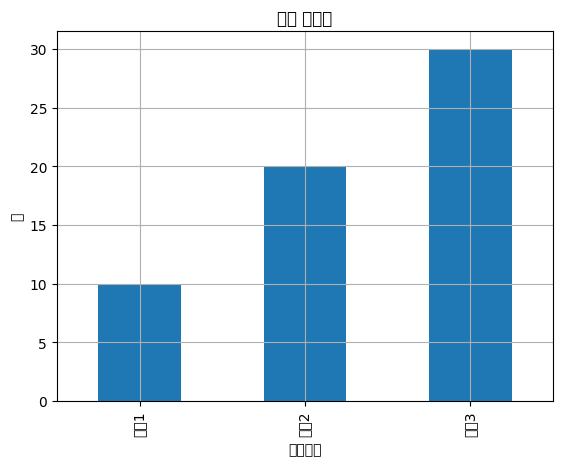

In [ ]:
import pandas as pd

s = pd.Series([10, 20, 30], index=["소득1", "소득2", "소득3"])
s.plot(kind='bar', grid=True)
plt.title("한글 테스트")
plt.xlabel("카테고리")
plt.ylabel("값")
plt.show()


In [ ]:
[f.name for f in fm.fontManager.ttflist if "Nanum" in f.name]

[]

In [ ]:
!apt-get -qq install -y fonts-nanum

In [ ]:
# 📌 STEP 1: 나눔 폰트 설치
!apt-get -qq install -y fonts-nanum > /dev/null

# 📌 STEP 2: matplotlib 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

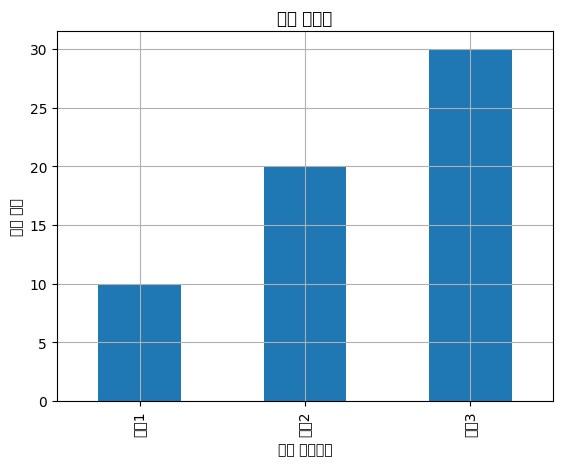

In [ ]:
import pandas as pd

# 예제 데이터
s = pd.Series([10, 20, 30], index=["소득1", "소득2", "소득3"])

# 그래프 그리기
s.plot(kind='bar', grid=True)
plt.title("한글 테스트")
plt.xlabel("소득 카테고리")
plt.ylabel("구역 개수")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing["income_cat"]):
  strat_train_set_n= housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n,strat_test_set_n])

In [ ]:
print(len(strat_splits[0][1]))

4128


In [ ]:
strat_train_set,strat_test_set=strat_splits[0]
strat_train_set,strat_test_set=train_test_split(housing,test_size=0.2,stratify=housing["income_cat"],random_state=42)

In [ ]:
for set_ in (strat_train_set,strat_test_set):
  set_.drop("income_cat",axis=1,inplace=True)

In [29]:
!git add CH2-2.ipynb
!git commit --amend -m "Fix: 토큰 제거 및 파일 수정"

[main 597e915] Fix: 토큰 제거 및 파일 수정
 Date: Fri Jun 13 04:55:29 2025 +0000
 1 file changed, 1 insertion(+), 1 deletion(-)


In [31]:
!git push

Enumerating objects: 13, done.
Counting objects: 100% (13/13), done.
Delta compression using up to 2 threads
Compressing objects: 100% (12/12), done.
Writing objects: 100% (12/12), 41.52 KiB | 1.89 MiB/s, done.
Total 12 (delta 6), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (6/6), done.
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-protection-from-the-command-line#resolving-a-blocked-push
remote:     
remote:     
remote:       —— GitHub Personal Access Token ——————————————————————
remote:        locations:
remote:         

In [34]:
!git reset HEAD~3  # 마지막 커밋을 되돌림 (커밋은 제거되지만 파일은 남아 있음)

In [35]:
!git log

commit 534cd0cafcb7ba57444884f1d2a0e5dbc56c581d (HEAD -> main, origin/main, origin/HEAD)
Author: Jungwon.Chun <113418803+JungwonChun@users.noreply.github.com>
Date:   Thu Jun 12 14:39:02 2025 +0900

    Colab을 통해 생성됨

commit 5d8e8473ab63ce6a42db2e356ffb13974f472f15
Author: Jungwon.Chun <113418803+JungwonChun@users.noreply.github.com>
Date:   Wed Jun 11 17:48:33 2025 +0900

    Colab을 통해 생성됨

commit 1135d4d069a215f6d9e3966ee5946061bda33826
Author: Jungwon.Chun <113418803+JungwonChun@users.noreply.github.com>
Date:   Wed Jun 11 16:48:15 2025 +0900

    Colab을 통해 생성됨

commit 374e02e513eb2927b9efdc2ef4b5adb93f4cbab8
Author: Jungwon.Chun <113418803+JungwonChun@users.noreply.github.com>
Date:   Wed Jun 11 16:43:50 2025 +0900

    Initial commit


In [36]:
!git push

Everything up-to-date


In [37]:
!git log

commit 534cd0cafcb7ba57444884f1d2a0e5dbc56c581d (HEAD -> main, origin/main, origin/HEAD)
Author: Jungwon.Chun <113418803+JungwonChun@users.noreply.github.com>
Date:   Thu Jun 12 14:39:02 2025 +0900

    Colab을 통해 생성됨

commit 5d8e8473ab63ce6a42db2e356ffb13974f472f15
Author: Jungwon.Chun <113418803+JungwonChun@users.noreply.github.com>
Date:   Wed Jun 11 17:48:33 2025 +0900

    Colab을 통해 생성됨

commit 1135d4d069a215f6d9e3966ee5946061bda33826
Author: Jungwon.Chun <113418803+JungwonChun@users.noreply.github.com>
Date:   Wed Jun 11 16:48:15 2025 +0900

    Colab을 통해 생성됨

commit 374e02e513eb2927b9efdc2ef4b5adb93f4cbab8
Author: Jungwon.Chun <113418803+JungwonChun@users.noreply.github.com>
Date:   Wed Jun 11 16:43:50 2025 +0900

    Initial commit
